# Carga de datos

In [10]:
import pandas as pd
import numpy as np

In [11]:
#Carga de datos con Embalses y rios
df=pd.read_csv('datos_rios_embalses_tiempo.csv',index_col=[0])
df

,id,superficie,fecha_x,lat,lng,idprovincia,provincia_x,idmunicipio,municipio,causa,...,prec_acu,hum_med,hum_max,hum_min,v_viento_med,presion,lluvia,helada,dist_est_x,dist_est_y
0,2001150021,5.00,2001-02-20 00:00:00-05:00,43.703581,-8.038777,15,A CORUÑA,22,CEDEIRA,2,...,97.0,78.0,92.0,58.0,3.0,1015.0,13.0,0.0,29.186920,29.186920
11,2001150088,1.50,2001-02-24 00:00:00-05:00,42.936918,-9.114350,15,A CORUÑA,34,DUMBRÍA,4,...,69.0,79.0,91.0,63.0,NaN,942.0,9.0,0.0,34.817885,34.817885
15,2001150090,3.00,2001-02-25 00:00:00-05:00,42.643031,-8.939252,15,A CORUÑA,67,"POBRA DO CARAMIÑAL, A",4,...,98.0,76.0,92.0,59.0,5.0,1017.0,10.0,0.0,12.204302,12.204302
26,2001150094,1.50,2001-02-25 00:00:00-05:00,43.186836,-8.685470,15,A CORUÑA,19,CARBALLO,4,...,12.0,92.0,99.0,74.0,NaN,NaN,17.0,8.0,3.411028,3.411028
32,2001150111,3.80,2001-02-25 00:00:00-05:00,42.917476,-9.082862,15,A CORUÑA,45,MAZARICOS,4,...,69.0,79.0,91.0,63.0,NaN,942.0,9.0,0.0,31.468092,31.468092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357650,2015360747,1.45,2015-09-06 00:00:00-04:00,42.103959,-8.522512,36,PONTEVEDRA,50,SALVATERRA DE MIÑO,4,...,108.0,76.0,96.0,48.0,3.0,NaN,10.0,0.0,5.065956,5.065956
357693,2015360751,1.00,2015-09-06 00:00:00-04:00,42.157695,-8.397080,36,PONTEVEDRA,34,"NEVES, AS",4,...,90.0,68.0,88.0,40.0,2.0,999.0,10.0,0.0,5.750805,5.750805
357743,2015360770,5.94,2015-09-08 00:00:00-04:00,42.554722,-8.018586,36,PONTEVEDRA,16,DOZÓN,4,...,117.0,76.0,90.0,55.0,19.0,905.0,9.0,0.0,7.535815,7.535815
357778,2015360794,3.20,2015-09-28 00:00:00-04:00,42.243441,-8.322375,36,PONTEVEDRA,13,COVELO,4,...,137.0,73.0,89.0,52.0,4.0,975.0,6.0,0.0,9.613333,9.613333


In [12]:
tiempo=pd.read_excel('tiempo.xlsx')
tiempo.columns = map(lambda x: str(x).lower(), tiempo.columns) 
tiempo['provincia'] = tiempo['provincia'].str.upper() 
tiempo['estación'] = tiempo['estación'].str.upper() 

#inclusión del código de la provincia:
tiempo['idprovincia'] = tiempo['provincia'].apply(lambda x: 15 if x=='A CORUÑA' else (32 if x=='OURENSE' else (27 if x=='LUGO' else 36)))
#inclusión del mes-año
tiempo['fecha']=tiempo['fecha'].astype(str)
tiempo['mes']=tiempo['fecha'].str[:7]
tiempo

,fecha,provincia,estación,latitud,longitud,temp_media,temp_max_med,temp_min_med,prec_acu,hum_med,hum_max,hum_min,v_viento_med,presion,lluvia,helada,idprovincia,mes
0,2001-02-01,A CORUÑA,CIS FERROL,43.491467,-8.252274,10.8,14.7,7.5,97.0,78.0,92.0,58.0,3.0,1015.0,13.0,0.0,15,2001-02
1,2001-02-01,A CORUÑA,CORRUBEDO,42.555164,-9.028601,11.8,15.2,9.1,98.0,76.0,92.0,59.0,5.0,1017.0,10.0,0.0,15,2001-02
2,2001-02-01,A CORUÑA,MABEGONDO,43.241367,-8.262225,9.0,15.4,3.4,95.0,83.0,99.0,54.0,2.0,1010.0,15.0,7.0,15,2001-02
3,2001-02-01,A CORUÑA,MARCO DA CURRA,43.343082,-7.894400,6.2,10.6,2.9,NaN,84.0,98.0,60.0,6.0,NaN,NaN,3.0,15,2001-02
4,2001-02-01,A CORUÑA,MURALLA,42.745583,-8.776306,8.3,11.3,5.4,69.0,79.0,91.0,63.0,NaN,942.0,9.0,0.0,15,2001-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,2015-12-01,PONTEVEDRA,TORREQUINTÁNS,42.537130,-8.716114,13.2,17.1,9.7,151.0,73.0,85.0,55.0,8.0,1017.0,24.0,0.0,36,2015-12
14796,2015-12-01,PONTEVEDRA,TREMOEDO,42.539917,-8.784433,13.1,16.8,9.7,141.0,75.0,88.0,57.0,5.0,1017.0,18.0,0.0,36,2015-12
14797,2015-12-01,PONTEVEDRA,VIGO,42.225945,-8.713502,13.8,17.5,10.9,109.0,84.0,98.0,61.0,NaN,NaN,16.0,0.0,36,2015-12
14798,2015-12-01,PONTEVEDRA,VIGO-CAMPUS,42.169926,-8.686054,11.6,13.9,9.7,154.0,75.0,90.0,59.0,20.0,971.0,18.0,0.0,36,2015-12


In [13]:
#Función distancias mínimas

from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 

def dist_min(df1,column_lat1,column_lat2,column_lng1,column_lng2,index,name):
    
    #Add column containing distances 
    df1[name]=df1.apply(lambda x: distance(x[column_lat1], x[column_lat2], x[column_lng1], x[column_lng2]), axis=1)
    #Selecting the min distance per id
    df1_min = df1.groupby([index]).agg({name: 'min'})
    df2 = pd.merge(df1, df1_min, on = index, how ='inner')
    df = df2[(df2[name+'_x']==df2[name+'_y']) | df2[name+'_x'].isna()]
    return(df)

## Regresión Logística

### Creación de datos

In [14]:
# Incendios totales
inc_totales=df[['id','mes','idprovincia','lat','lng']]
inc_totales['coord']=list(zip(inc_totales.lat, inc_totales.lng))
inc_totales=inc_totales.reset_index()

#Localización única de incendios
localizacion_inc_unic=inc_totales[['coord','lat','lng','idprovincia']].drop_duplicates().reset_index()


<ipython-input-14-9f62b0560cb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_totales['coord']=list(zip(inc_totales.lat, inc_totales.lng))


In [15]:
inc_totales

,index,id,mes,idprovincia,lat,lng,coord
0,0,2001150021,2001-02,15,43.703581,-8.038777,"(43.703581, -8.038777)"
1,11,2001150088,2001-02,15,42.936918,-9.114350,"(42.936918, -9.11435)"
2,15,2001150090,2001-02,15,42.643031,-8.939252,"(42.643031, -8.939252)"
3,26,2001150094,2001-02,15,43.186836,-8.685470,"(43.186836, -8.68547)"
4,32,2001150111,2001-02,15,42.917476,-9.082862,"(42.917476, -9.082861999999999)"
...,...,...,...,...,...,...,...
24578,357650,2015360747,2015-09,36,42.103959,-8.522512,"(42.10395894, -8.52251246)"
24579,357693,2015360751,2015-09,36,42.157695,-8.397080,"(42.15769512, -8.39708026)"
24580,357743,2015360770,2015-09,36,42.554722,-8.018586,"(42.55472219, -8.01858582)"
24581,357778,2015360794,2015-09,36,42.243441,-8.322375,"(42.24344138, -8.32237515)"


In [16]:
localizacion_inc_unic

,index,coord,lat,lng,idprovincia
0,0,"(43.703581, -8.038777)",43.703581,-8.038777,15
1,1,"(42.936918, -9.11435)",42.936918,-9.114350,15
2,2,"(42.643031, -8.939252)",42.643031,-8.939252,15
3,3,"(43.186836, -8.68547)",43.186836,-8.685470,15
4,4,"(42.917476, -9.082861999999999)",42.917476,-9.082862,15
...,...,...,...,...,...
11795,24578,"(42.10395894, -8.52251246)",42.103959,-8.522512,36
11796,24579,"(42.15769512, -8.39708026)",42.157695,-8.397080,36
11797,24580,"(42.55472219, -8.01858582)",42.554722,-8.018586,36
11798,24581,"(42.24344138, -8.32237515)",42.243441,-8.322375,36


In [17]:
inc_totales['mes'].unique()

array(['2001-02', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-11', '2001-12', '2002-02', '2002-03', '2002-04',
       '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10',
       '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
       '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2004-02',
       '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08',
       '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02',
       '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08',
       '2005-09', '2005-10', '2005-12', '2006-01', '2006-02', '2006-03',
       '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09',
       '2006-11', '2006-12', '2007-02', '2007-03', '2007-04', '2007-05',
       '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11',
       '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05',
       '2008-06', '2008-07', '2008-08', '2008-09', 

In [76]:
inc=pd.DataFrame()
for i in inc_totales['mes'].unique():
    print('Mes: '+str(i))
    #Inclusión de los incendios del mes i
    inc_i=inc_totales[inc_totales['mes']==i][['mes','idprovincia','lat','lng','coord']]
    inc_i['lume']=1
    
    inc=inc.append(inc_i)
    
    #Inclusión de los NO incendios del mes i
    index_noinc=np.vectorize(lambda t: t not in inc_totales[inc_totales['mes']==i]['coord'].tolist())
    noinc_i=localizacion_inc_unic[index_noinc(localizacion_inc_unic['coord'])]
    noinc_i['mes']=i
    noinc_i['lume']=0
    
    inc=inc.append(noinc_i[['mes','idprovincia','lat','lng','coord','lume']])

inc

Mes: 2001-02


<ipython-input-76-94ffad726182>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noinc_i['mes']=i
<ipython-input-76-94ffad726182>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noinc_i['lume']=0


Mes: 2001-04
Mes: 2001-05
Mes: 2001-06
Mes: 2001-07
Mes: 2001-08
Mes: 2001-09
Mes: 2001-11
Mes: 2001-12
Mes: 2002-02
Mes: 2002-03
Mes: 2002-04
Mes: 2002-05
Mes: 2002-06
Mes: 2002-07
Mes: 2002-08
Mes: 2002-09
Mes: 2002-10
Mes: 2003-01
Mes: 2003-02
Mes: 2003-03
Mes: 2003-04
Mes: 2003-05
Mes: 2003-06
Mes: 2003-07
Mes: 2003-08
Mes: 2003-09
Mes: 2003-10
Mes: 2003-11
Mes: 2004-02
Mes: 2004-03
Mes: 2004-04
Mes: 2004-05
Mes: 2004-06
Mes: 2004-07
Mes: 2004-08
Mes: 2004-09
Mes: 2004-10
Mes: 2004-11
Mes: 2004-12
Mes: 2005-01
Mes: 2005-02
Mes: 2005-03
Mes: 2005-04
Mes: 2005-05
Mes: 2005-06
Mes: 2005-07
Mes: 2005-08
Mes: 2005-09
Mes: 2005-10
Mes: 2005-12
Mes: 2006-01
Mes: 2006-02
Mes: 2006-03
Mes: 2006-04
Mes: 2006-05
Mes: 2006-06
Mes: 2006-07
Mes: 2006-08
Mes: 2006-09
Mes: 2006-11
Mes: 2006-12
Mes: 2007-02
Mes: 2007-03
Mes: 2007-04
Mes: 2007-05
Mes: 2007-06
Mes: 2007-07
Mes: 2007-08
Mes: 2007-09
Mes: 2007-10
Mes: 2007-11
Mes: 2007-12
Mes: 2008-01
Mes: 2008-02
Mes: 2008-03
Mes: 2008-04
Mes: 2008-05

,mes,idprovincia,lat,lng,coord,lume
0,2001-02,15,43.703581,-8.038777,"(43.703581, -8.038777)",1
1,2001-02,15,42.936918,-9.114350,"(42.936918, -9.11435)",1
2,2001-02,15,42.643031,-8.939252,"(42.643031, -8.939252)",1
3,2001-02,15,43.186836,-8.685470,"(43.186836, -8.68547)",1
4,2001-02,15,42.917476,-9.082862,"(42.917476, -9.082861999999999)",1
...,...,...,...,...,...,...
11795,2015-02,36,42.103959,-8.522512,"(42.10395894, -8.52251246)",0
11796,2015-02,36,42.157695,-8.397080,"(42.15769512, -8.39708026)",0
11797,2015-02,36,42.554722,-8.018586,"(42.55472219, -8.01858582)",0
11798,2015-02,36,42.243441,-8.322375,"(42.24344138, -8.32237515)",0


In [75]:
inc[(inc['mes']=='2001-02')][['mes', 'idprovincia', 'lat', 'lng']].drop_duplicates()

,mes,idprovincia,lat,lng
0,2001-02,15,43.703581,-8.038777
1,2001-02,15,42.936918,-9.114350
2,2001-02,15,42.643031,-8.939252
3,2001-02,15,43.186836,-8.685470
4,2001-02,15,42.917476,-9.082862
...,...,...,...,...
11795,2001-02,36,42.103959,-8.522512
11796,2001-02,36,42.157695,-8.397080
11797,2001-02,36,42.554722,-8.018586
11798,2001-02,36,42.243441,-8.322375


In [77]:
inc.to_csv('inc_reg_log.csv')

In [19]:
inc= pd.read_csv('inc_reg_log.csv')

In [20]:
inc[inc['lume']==1]

,Unnamed: 0,mes,idprovincia,lat,lng,coord,lume
0,0,2001-02,15,43.703581,-8.038777,"(43.703581, -8.038777)",1
1,1,2001-02,15,42.936918,-9.114350,"(42.936918, -9.11435)",1
2,2,2001-02,15,42.643031,-8.939252,"(42.643031, -8.939252)",1
3,3,2001-02,15,43.186836,-8.685470,"(43.186836, -8.68547)",1
4,4,2001-02,15,42.917476,-9.082862,"(42.917476, -9.082861999999999)",1
...,...,...,...,...,...,...,...
1999104,19809,2013-01,32,41.962732,-8.079650,"(41.962732, -8.07965)",1
2010902,19810,2013-02,32,42.295677,-7.933905,"(42.29567700000001, -7.933905)",1
2022702,20250,2014-12,32,41.988515,-7.162543,"(41.9885151, -7.16254262)",1
2034502,20268,2015-02,32,41.961326,-7.008207,"(41.96132639, -7.00820685)",1


In [21]:
inc=inc.reset_index()

In [22]:
inc=inc.reset_index()
inc=inc[['level_0','mes','idprovincia','lat','lng','coord','lume']]

In [23]:
np.sort(inc['mes'].unique())

array(['2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07',
       '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01',
       '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07',
       '2002-08', '2002-09', '2002-10', '2003-01', '2003-02', '2003-03',
       '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03',
       '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09',
       '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03',
       '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09',
       '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03',
       '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09',
       '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04',
       '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10',
       '2007-11', '2007-12', '2008-01', '2008-02', 

In [24]:
df_inc_tiempo=pd.DataFrame()

for i in np.sort(inc['mes'].unique()):
    print('mes ' +i)
    dfi=pd.merge(inc[inc['mes']==i], tiempo[tiempo['mes']==i], on=['idprovincia', 'mes'], how='inner')
    dfi = dist_min(dfi, 'lat', 'latitud', 'lng', 'longitud', 'level_0','dist_est')
    df_inc_tiempo=pd.concat([df_inc_tiempo,dfi], axis=0)
    

mes 2001-02
mes 2001-03
mes 2001-04
mes 2001-05
mes 2001-06
mes 2001-07
mes 2001-08
mes 2001-09
mes 2001-10
mes 2001-11
mes 2001-12
mes 2002-01
mes 2002-02
mes 2002-03
mes 2002-04
mes 2002-05
mes 2002-06
mes 2002-07
mes 2002-08
mes 2002-09
mes 2002-10
mes 2003-01
mes 2003-02
mes 2003-03
mes 2003-04
mes 2003-05
mes 2003-06
mes 2003-07
mes 2003-08
mes 2003-09
mes 2003-10
mes 2003-11
mes 2003-12
mes 2004-01
mes 2004-02
mes 2004-03
mes 2004-04
mes 2004-05
mes 2004-06
mes 2004-07
mes 2004-08
mes 2004-09
mes 2004-10
mes 2004-11
mes 2004-12
mes 2005-01
mes 2005-02
mes 2005-03
mes 2005-04
mes 2005-05
mes 2005-06
mes 2005-07
mes 2005-08
mes 2005-09
mes 2005-10
mes 2005-11
mes 2005-12
mes 2006-01
mes 2006-02
mes 2006-03
mes 2006-04
mes 2006-05
mes 2006-06
mes 2006-07
mes 2006-08
mes 2006-09
mes 2006-11
mes 2006-12
mes 2007-01
mes 2007-02
mes 2007-03
mes 2007-04
mes 2007-05
mes 2007-06
mes 2007-07
mes 2007-08
mes 2007-09
mes 2007-10
mes 2007-11
mes 2007-12
mes 2008-01
mes 2008-02
mes 2008-03
mes 

In [25]:
df_inc_tiempo

,level_0,mes,idprovincia,lat,lng,coord,lume,fecha,provincia,estación,...,prec_acu,hum_med,hum_max,hum_min,v_viento_med,presion,lluvia,helada,dist_est_x,dist_est_y
0,0,2001-02,15,43.703581,-8.038777,"(43.703581, -8.038777)",1,2001-02-01,A CORUÑA,CIS FERROL,...,97.0,78.0,92.0,58.0,3.0,1015.0,13.0,0.0,29.186920,29.186920
11,1,2001-02,15,42.936918,-9.114350,"(42.936918, -9.11435)",1,2001-02-01,A CORUÑA,MURALLA,...,69.0,79.0,91.0,63.0,NaN,942.0,9.0,0.0,34.817885,34.817885
15,2,2001-02,15,42.643031,-8.939252,"(42.643031, -8.939252)",1,2001-02-01,A CORUÑA,CORRUBEDO,...,98.0,76.0,92.0,59.0,5.0,1017.0,10.0,0.0,12.204302,12.204302
26,3,2001-02,15,43.186836,-8.685470,"(43.186836, -8.68547)",1,2001-02-01,A CORUÑA,RUS,...,12.0,92.0,99.0,74.0,NaN,NaN,17.0,8.0,3.411028,3.411028
32,4,2001-02,15,42.917476,-9.082862,"(42.917476, -9.082861999999999)",1,2001-02-01,A CORUÑA,MURALLA,...,69.0,79.0,91.0,63.0,NaN,942.0,9.0,0.0,31.468092,31.468092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418007,1798477,2015-12,36,42.140001,-8.321870,"(42.140001, -8.32186971)",0,2015-12-01,PONTEVEDRA,CEQUELIÑOS,...,68.0,83.0,97.0,60.0,10.0,NaN,21.0,0.0,4.850504,4.850504
418047,1798478,2015-12,36,42.103959,-8.522512,"(42.10395894, -8.52251246)",0,2015-12-01,PONTEVEDRA,ENTENZA,...,125.0,86.0,98.0,63.0,4.0,NaN,28.0,0.0,5.065956,5.065956
418090,1798479,2015-12,36,42.157695,-8.397080,"(42.15769512, -8.39708026)",0,2015-12-01,PONTEVEDRA,MEDER,...,103.0,75.0,88.0,56.0,4.0,1008.0,24.0,1.0,5.750805,5.750805
418140,1798480,2015-12,36,42.554722,-8.018586,"(42.55472219, -8.01858582)",0,2015-12-01,PONTEVEDRA,SERRA DO FARO,...,159.0,86.0,95.0,73.0,30.0,911.0,20.0,0.0,7.535815,7.535815


In [26]:
df_inc_tiempo.columns

Index(['level_0', 'mes', 'idprovincia', 'lat', 'lng', 'coord', 'lume', 'fecha',
       'provincia', 'estación', 'latitud', 'longitud', 'temp_media',
       'temp_max_med', 'temp_min_med', 'prec_acu', 'hum_med', 'hum_max',
       'hum_min', 'v_viento_med', 'presion', 'lluvia', 'helada', 'dist_est_x',
       'dist_est_y'],
      dtype='object')

In [28]:
df_inc_tiempo_sna=df_inc_tiempo[['temp_media',
       'temp_max_med', 'temp_min_med', 'prec_acu', 'hum_med', 
        'v_viento_med', 'lluvia', 'helada','lume']].dropna()

In [29]:
df_inc_tiempo_sna.to_csv('dataset_final')

## Modelo

In [33]:
df=pd.read_csv('dataset_final')
df

,Unnamed: 0,idprovincia,temp_media,temp_max_med,temp_min_med,prec_acu,hum_med,v_viento_med,lluvia,helada,lume
0,0,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,1
1,15,15,11.8,15.2,9.1,98.0,76.0,5.0,10.0,0.0,1
2,35,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
3,77,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
4,98,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1413606,418007,36,11.3,15.8,7.7,68.0,83.0,10.0,21.0,0.0,0
1413607,418047,36,11.7,16.7,7.8,125.0,86.0,4.0,28.0,0.0,0
1413608,418090,36,12.1,16.4,8.2,103.0,75.0,4.0,24.0,1.0,0
1413609,418140,36,7.1,9.6,5.2,159.0,86.0,30.0,20.0,0.0,0


In [34]:
z=df[['idprovincia','temp_media',
       'temp_max_med', 'temp_min_med', 'prec_acu', 'hum_med', 
        'v_viento_med', 'lluvia', 'helada','lume']]
z=z.dropna()

In [35]:
z[z['lume']==0]

,temp_media,temp_max_med,temp_min_med,prec_acu,hum_med,v_viento_med,lluvia,helada,lume
2,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
3,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
4,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
5,9.0,15.4,3.4,95.0,83.0,2.0,15.0,7.0,0
6,9.0,15.4,3.4,95.0,83.0,2.0,15.0,7.0,0
...,...,...,...,...,...,...,...,...,...
1413606,11.3,15.8,7.7,68.0,83.0,10.0,21.0,0.0,0
1413607,11.7,16.7,7.8,125.0,86.0,4.0,28.0,0.0,0
1413608,12.1,16.4,8.2,103.0,75.0,4.0,24.0,1.0,0
1413609,7.1,9.6,5.2,159.0,86.0,30.0,20.0,0.0,0


In [19]:
X=z[['idprovincia','temp_media',
       'temp_max_med', 'temp_min_med', 'prec_acu', 'hum_med', 
        'v_viento_med', 'lluvia', 'helada']]
y=z['lume']

In [20]:
z

,idprovincia,temp_media,temp_max_med,temp_min_med,prec_acu,hum_med,v_viento_med,lluvia,helada,lume
0,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,1
1,15,11.8,15.2,9.1,98.0,76.0,5.0,10.0,0.0,1
2,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
3,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
4,15,10.8,14.7,7.5,97.0,78.0,3.0,13.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1413606,36,11.3,15.8,7.7,68.0,83.0,10.0,21.0,0.0,0
1413607,36,11.7,16.7,7.8,125.0,86.0,4.0,28.0,0.0,0
1413608,36,12.1,16.4,8.2,103.0,75.0,4.0,24.0,1.0,0
1413609,36,7.1,9.6,5.2,159.0,86.0,30.0,20.0,0.0,0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
clf=LogisticRegression()

In [38]:
clf.fit(X_train,y_train)

LogisticRegression()

In [39]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
np.sum(clf.predict(X_test))

0

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

C:\Users\javier.ruibal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    279368
           1       0.00      0.00      0.00      3355

    accuracy                           0.99    282723
   macro avg       0.49      0.50      0.50    282723
weighted avg       0.98      0.99      0.98    282723



C:\Users\javier.ruibal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\javier.ruibal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
 clf.score(X, y)

0.9879252495912949

In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'tpr')

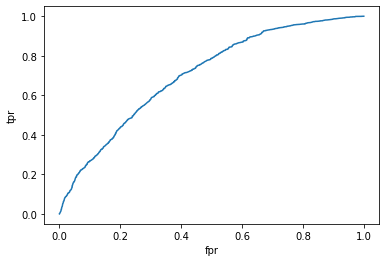

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:, 1]) 
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [217]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring='accuracy').mean()

C:\Users\javier.ruibal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\javier.ruibal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.9879252495917713

In [219]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(clf.predict(X_test),y_test)

0.0121178680192273

In [220]:
clf.intercept_

array([-0.039394])

In [221]:
list(zip(X.columns, clf.coef_.flatten(), ))

[('idprovincia', -0.03340175271532213),
 ('temp_media', -0.16336813222177332),
 ('temp_max_med', 0.05020477963792285),
 ('temp_min_med', 0.14635562617384162),
 ('prec_acu', 0.000266359127758878),
 ('hum_med', -0.03089602505417375),
 ('v_viento_med', -0.04888362133356315),
 ('lluvia', -0.08834992812168058),
 ('helada', 0.05281848418039363)]

In [222]:
 clf.score(X, y)

0.9879252495912949

Text(0, 0.5, 'tpr')

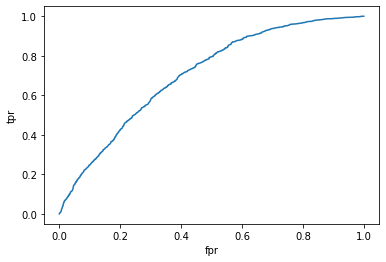

In [223]:
fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:, 1]) 
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [22]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
 
from pylab import rcParams
 
from collections import Counter

In [23]:
import seaborn as sns

C:\Users\javier.ruibal\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\javier.ruibal\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


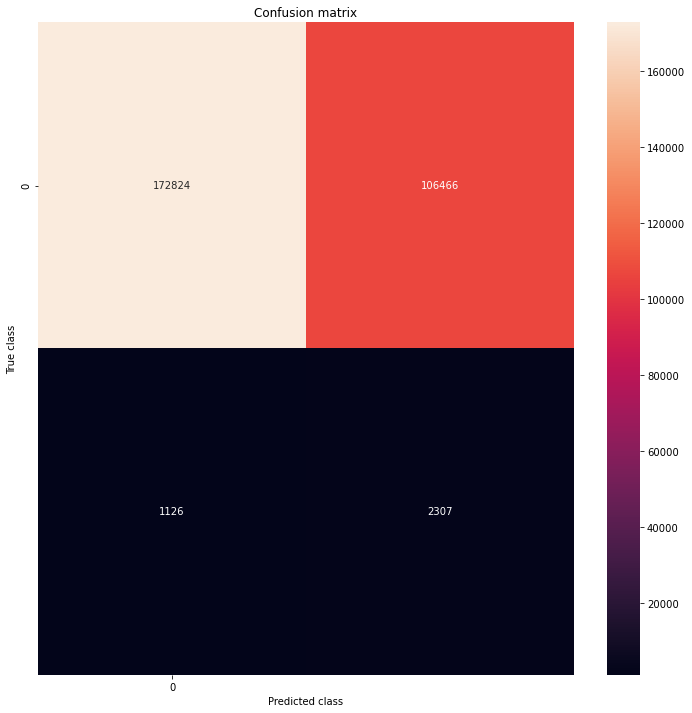

              precision    recall  f1-score   support

           0       0.99      0.62      0.76    279290
           1       0.02      0.67      0.04      3433

    accuracy                           0.62    282723
   macro avg       0.51      0.65      0.40    282723
weighted avg       0.98      0.62      0.75    282723



In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=2, yticklabels=2, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [24]:

from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 

In [169]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [171]:
classifier = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier.fit(X_train, y_train) 
 



C:\Users\javier.ruibal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
predictions = classifier.predict(X_test) 
probabilities = classifier.predict_proba(X_test)[:, 1]

In [173]:
predictions, probabilities

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0.00863934, 0.00732583, 0.00264001, ..., 0.01251075, 0.04351304,
        0.04849294]))

Text(0, 0.5, 'tpr')

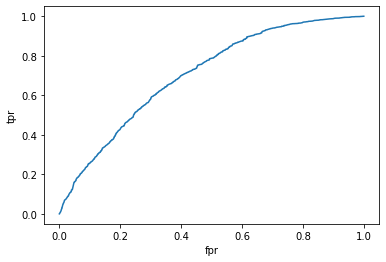

In [175]:
fpr, tpr, threshold = roc_curve(y_test, probabilities) 
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [177]:
clf.intercept_

array([0.14806017])

In [180]:
list(zip(X.columns, clf.coef_.flatten(), ))

[('idprovincia', -0.012492750065834491),
 ('temp_media', -0.26360995647998725),
 ('temp_max_med', 0.1634697928529979),
 ('temp_min_med', 0.1562749877969309),
 ('prec_acu', 0.00035151962182760157),
 ('hum_med', 0.005093481457878992),
 ('v_viento_med', -0.023825513833464353),
 ('lluvia', -0.10523577627722783),
 ('helada', 0.06565581115570607)]

In [174]:
accuracy_score(y_test, predictions), f1_score(y_test, predictions), roc_auc_score(y_test, probabilities)


(0.98795143221761, 0.0, 0.7056607784159521)